<div style="position: relative; text-align: center; background: #000; padding: 20px 10px; border-radius: 15px; box-shadow: 0 10px 25px rgba(0,0,0,0.7); font-family: 'Segoe UI', sans-serif; color: white;">

<img src="https://i.postimg.cc/L6P2khWV/rp.jpg"
     alt="Title Image"
     style="display: block; 
            margin: 2px auto 5px auto; 
            border-radius: 20px; 
            box-shadow: 0 0 10px #666;
            width: 900px;">

  
  <span style="
  color: #B8860B;
  font-family: 'Times New Roman', Times, serif;
  font-weight: bold;
  padding-bottom: 2px;
">
  Samane Najarian
</span>

</div>

In [39]:
#install.packages("dplyr") 
#install.packages("car")
#install.packages("tseries")
library("car")
library("moments")
library(dplyr)
library(tseries)
library(ggplot2)

In [1]:
data1<- read.csv("/kaggle/input/carprice/dataset1.csv")
head(data1)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,13500,23,46986,Diesel,90,1,0,2000,3,1165
2,13750,23,72937,Diesel,90,1,0,2000,3,1165
3,13950,24,41711,Diesel,90,1,0,2000,3,1165
4,14950,26,48000,Diesel,90,0,0,2000,3,1165
5,13750,30,38500,Diesel,90,0,0,2000,3,1170
6,12950,32,61000,Diesel,90,0,0,2000,3,1170


In [2]:
dim(data1)

[1] 1325   10

In [4]:
str(data1)

'data.frame':	1325 obs. of  10 variables:
 $ Price    : int  13500 13750 13950 14950 13750 12950 16900 12950 16750 16950 ...
 $ Age      : int  23 23 24 26 30 32 27 23 24 30 ...
 $ KM       : int  46986 72937 41711 48000 38500 61000 94612 71138 25563 64359 ...
 $ FuelType : chr  "Diesel" "Diesel" "Diesel" "Diesel" ...
 $ HP       : int  90 90 90 90 90 90 90 69 110 110 ...
 $ MetColor : int  1 1 1 0 0 0 1 0 0 1 ...
 $ Automatic: int  0 0 0 0 0 0 0 0 0 0 ...
 $ CC       : int  2000 2000 2000 2000 2000 2000 2000 1900 1600 1600 ...
 $ Doors    : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Weight   : int  1165 1165 1165 1165 1170 1170 1245 1105 1065 1105 ...


In [5]:
summary(data1)

     Price            Age              KM           FuelType        
 Min.   : 4350   Min.   :13.00   Min.   :     1   Length:1325       
 1st Qu.: 8250   1st Qu.:50.00   1st Qu.: 47211   Class :character  
 Median : 9500   Median :62.00   Median : 66000   Mode  :character  
 Mean   : 9939   Mean   :59.19   Mean   : 72339                     
 3rd Qu.:10995   3rd Qu.:71.00   3rd Qu.: 89800                     
 Max.   :16950   Max.   :80.00   Max.   :243000                     
       HP           MetColor        Automatic             CC      
 Min.   : 69.0   Min.   :0.0000   Min.   :0.00000   Min.   :1300  
 1st Qu.: 86.0   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:1400  
 Median :110.0   Median :1.0000   Median :0.00000   Median :1600  
 Mean   :100.4   Mean   :0.6642   Mean   :0.05358   Mean   :1558  
 3rd Qu.:110.0   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:1600  
 Max.   :116.0   Max.   :1.0000   Max.   :1.00000   Max.   :2000  
     Doors           Weight    
 Min.   :2.000  

### **🚗 Dataset Description**

This dataset contains detailed specifications of used cars, including price, age, mileage, fuel type, horsepower, transmission type, engine size, number of doors, and weight.
The main purpose of this dataset is to use these features to predict car prices.

---

### 👉 Data Preprocessing: Converting Variables to Factors
The dataset contains 10 variables. Among them, one variable (fuel type) is categorical, and two variables (whether the car color is metallic and whether the transmission is automatic) are binary by nature and need to be converted. Since the fuel type variable is of character type and the other two variables are numeric, these variables should be converted to factors.

In [7]:
data1$FuelType <- as.factor(data1$FuelType)
data1$MetColor <- as.factor(data1$MetColor)
data1$Automatic <- as.factor(data1$Automatic)
data1$Doors <- as.factor(data1$Doors)

In [8]:
length(unique(data1$HP))

[1] 9

In [9]:
length(unique(data1$CC))

[1] 11

----
# <p style="font-family:newtimeroman;color:#FFD700;font-size:90%;text-align:center;border-radius:10px 10px;">Visualization</p>

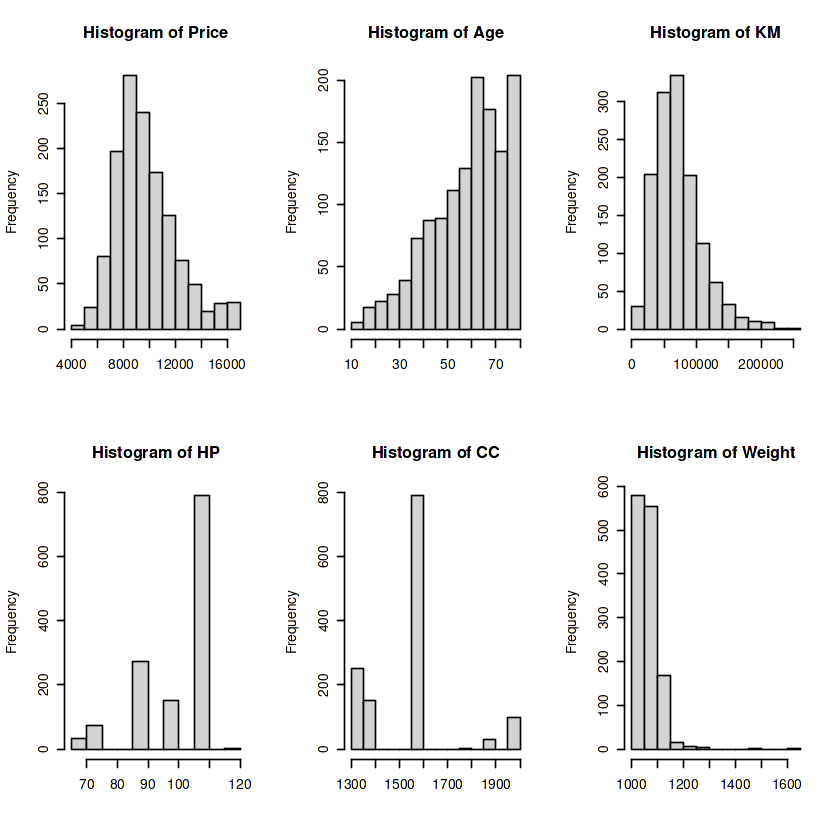

In [11]:
#Continuous variables
vars_con <- c(1:3, 5, 8, 10)
par(mfrow = c(2, 3))  # 2 rows and 3 columns
for (i in vars_con) {
  hist(data1[,i], xlab = "", main = paste("Histogram of", names(data1)[i]))
}
par(mfrow=c(1,1))

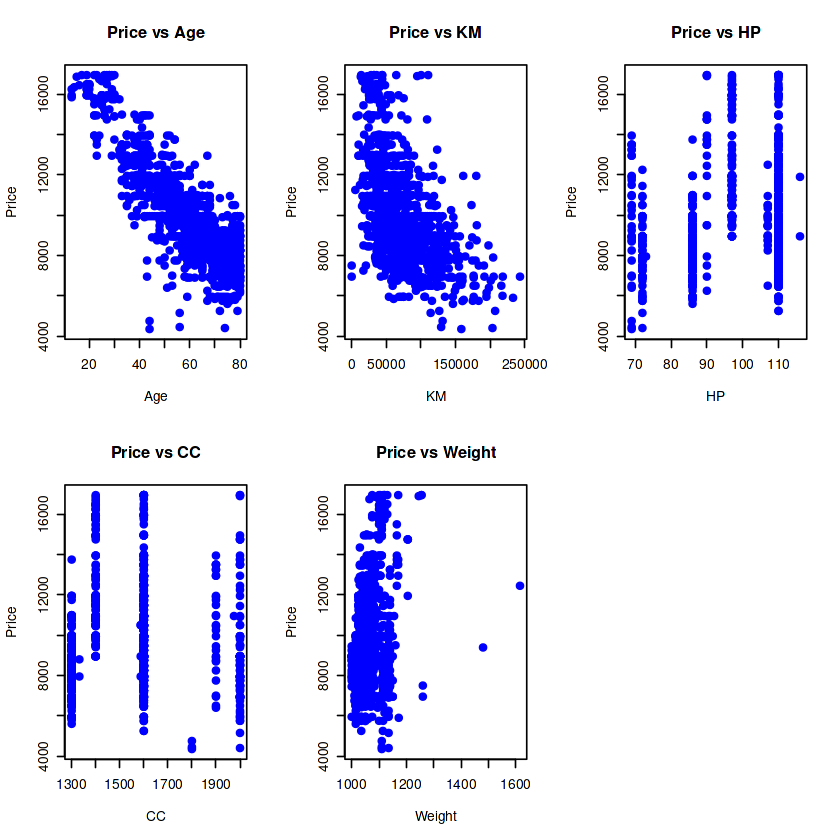

In [12]:
par(mfrow = c(2, 3))
for (i in vars_con) {
  if (names(data1)[i] != "Price") {
    plot(data1[[i]], data1$Price,
         main = paste("Price vs", names(data1)[i]),
         xlab = names(data1)[i],
         ylab = "Price",
         pch = 19, col = "blue")
  }
}

----
# <p style="font-family:newtimeroman;color:#FFD700;font-size:90%;text-align:center;border-radius:10px 10px;">CrossTab Table</p>

In [13]:
cor_table <- round(cor(data1[,vars_con]),2)
cor_table

,Price,Age,KM,HP,CC,Weight
Price,1.00,-0.84,-0.52,0.20,0.01,0.29
Age,-0.84,1.00,0.39,-0.05,-0.05,-0.27
KM,-0.52,0.39,1.00,-0.33,0.39,0.19
HP,0.20,-0.05,-0.33,1.00,-0.02,-0.08
CC,0.01,-0.05,0.39,-0.02,1.00,0.66
Weight,0.29,-0.27,0.19,-0.08,0.66,1.00


----
# <p style="font-family:newtimeroman;color:#FFD700;font-size:90%;text-align:center;border-radius:10px 10px;">Categorical variables</p>

In [17]:
cat("===== Table 1: Fuel Type =====\n")
print(table(data1$FuelType))
cat("\n---------------------------------------\n")

cat("===== Table 2: Metallic Color =====\n")
print(table(data1$MetColor))
cat("\n---------------------------------------\n")

cat("===== Table 3: Transmission Type (Automatic) =====\n")
print(table(data1$Automatic))
cat("\n---------------------------------------\n")

cat("===== Table 4: Number of Doors =====\n")
print(table(data1$Doors))
cat("\n---------------------------------------\n")

===== Table 1: Fuel Type =====

   CNG Diesel Petrol 
    17    132   1176 

---------------------------------------
===== Table 2: Metallic Color =====

  0   1 
445 880 

---------------------------------------
===== Table 3: Transmission Type (Automatic) =====

   0    1 
1254   71 

---------------------------------------
===== Table 4: Number of Doors =====

  2   3   4   5 
  2 593 130 600 

---------------------------------------


In [18]:
data1$Doors <- ifelse(data1$Doors %in% c(2, 3), "<4", as.character(data1$Doors))
head(data1)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<int>,<chr>,<int>
1,13500,23,46986,Diesel,90,1,0,2000,<4,1165
2,13750,23,72937,Diesel,90,1,0,2000,<4,1165
3,13950,24,41711,Diesel,90,1,0,2000,<4,1165
4,14950,26,48000,Diesel,90,0,0,2000,<4,1165
5,13750,30,38500,Diesel,90,0,0,2000,<4,1170
6,12950,32,61000,Diesel,90,0,0,2000,<4,1170


----
# <p style="font-family:newtimeroman;color:#FFD700;font-size:90%;text-align:center;border-radius:10px 10px;">Modeling</p>

In [20]:
#Devide dataset
set.seed(880)
train_cases <- sample(6:nrow(data1), nrow(data1) * 0.7)
train <- data1 [train_cases,]
test <- data1[- train_cases,]
dim(train)
dim(test)

[1] 927  10

[1] 398  10

In [21]:
summary(train)

     Price            Age              KM           FuelType         HP       
 Min.   : 4400   Min.   :13.00   Min.   :     1   CNG   : 12   Min.   : 69.0  
 1st Qu.: 8250   1st Qu.:50.00   1st Qu.: 47037   Diesel: 76   1st Qu.: 86.0  
 Median : 9750   Median :62.00   Median : 65500   Petrol:839   Median :110.0  
 Mean   : 9982   Mean   :59.35   Mean   : 71168                Mean   :100.7  
 3rd Qu.:10995   3rd Qu.:71.50   3rd Qu.: 88064                3rd Qu.:110.0  
 Max.   :16950   Max.   :80.00   Max.   :243000                Max.   :110.0  
 MetColor Automatic       CC          Doors               Weight    
 0:300    0:878     Min.   :1300   Length:927         Min.   :1000  
 1:627    1: 49     1st Qu.:1400   Class :character   1st Qu.:1035  
                    Median :1600   Mode  :character   Median :1060  
                    Mean   :1547                      Mean   :1064  
                    3rd Qu.:1600                      3rd Qu.:1076  
                    Max.   :2000 

In [22]:
summary(test)

     Price            Age              KM           FuelType         HP        
 Min.   : 4350   Min.   :13.00   Min.   : 10000   CNG   :  5   Min.   : 69.00  
 1st Qu.: 8250   1st Qu.:49.00   1st Qu.: 47725   Diesel: 56   1st Qu.: 86.00  
 Median : 9500   Median :62.00   Median : 68262   Petrol:337   Median :110.00  
 Mean   : 9839   Mean   :58.82   Mean   : 75065                Mean   : 99.93  
 3rd Qu.:10984   3rd Qu.:70.75   3rd Qu.: 93306                3rd Qu.:110.00  
 Max.   :16950   Max.   :80.00   Max.   :232940                Max.   :116.00  
 MetColor Automatic       CC          Doors               Weight    
 0:145    0:376     Min.   :1300   Length:398         Min.   :1000  
 1:253    1: 22     1st Qu.:1400   Class :character   1st Qu.:1040  
                    Median :1600   Mode  :character   Median :1065  
                    Mean   :1583                      Mean   :1067  
                    3rd Qu.:1600                      3rd Qu.:1080  
                    Max.  

In [24]:
#Linear Regression Model
m1 <- lm(Price ~ KM, data = train)
m1


Call:
lm(formula = Price ~ KM, data = train)

Coefficients:
(Intercept)           KM  
  1.234e+04   -3.315e-02  


In [25]:
summary(m1)


Call:
lm(formula = Price ~ KM, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5391.8 -1327.0  -315.8  1194.9  8268.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.234e+04  1.500e+02   82.26   <2e-16 ***
KM          -3.315e-02  1.891e-03  -17.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2018 on 925 degrees of freedom
Multiple R-squared:  0.2494,	Adjusted R-squared:  0.2486 
F-statistic: 307.3 on 1 and 925 DF,  p-value: < 2.2e-16


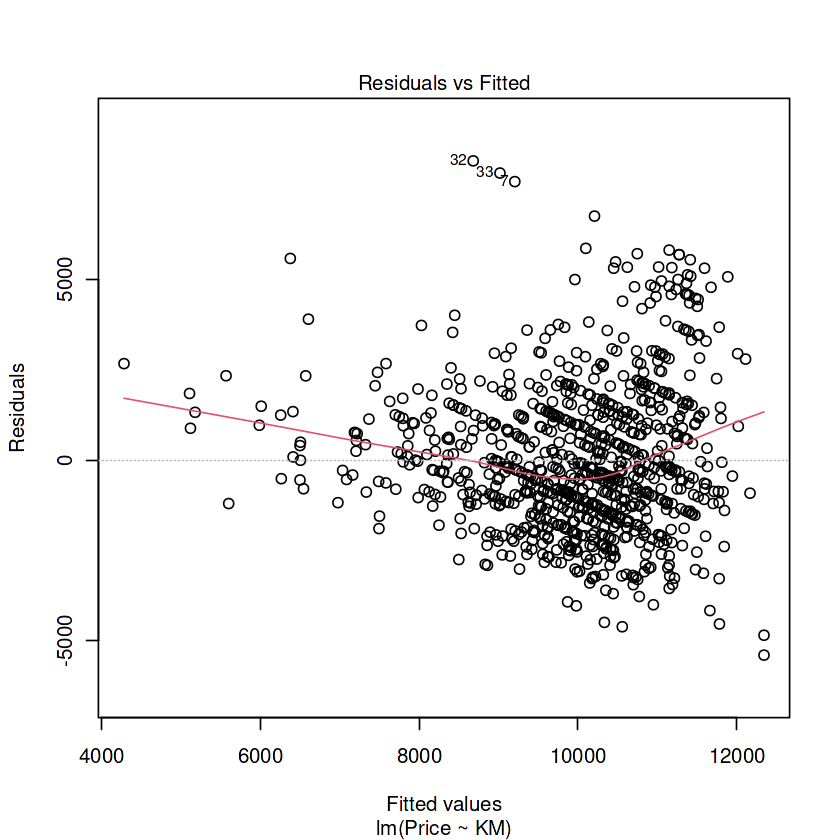

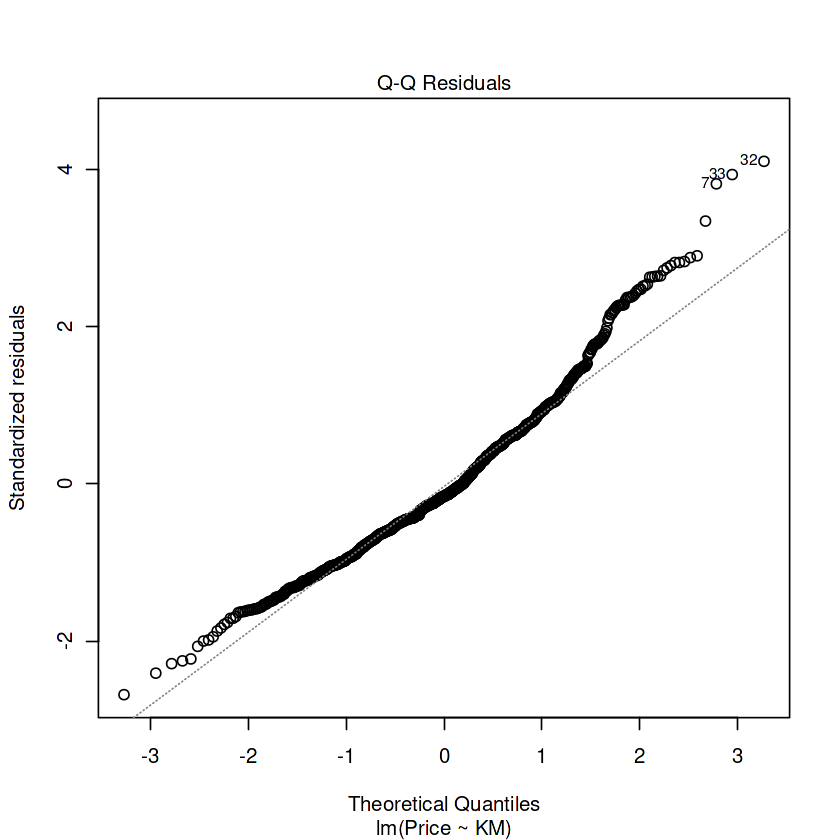

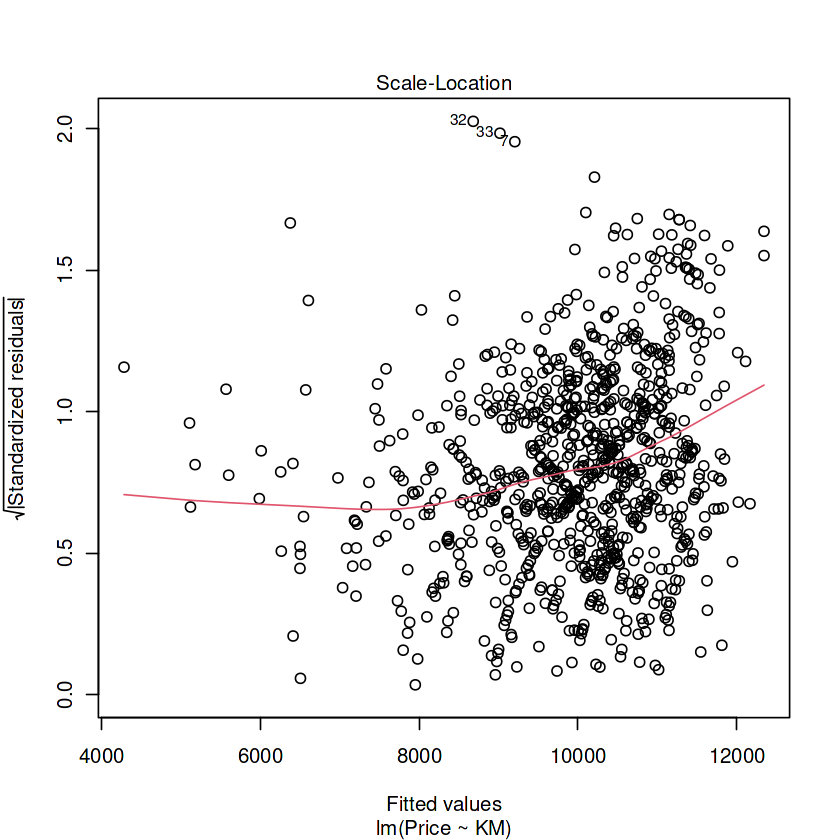

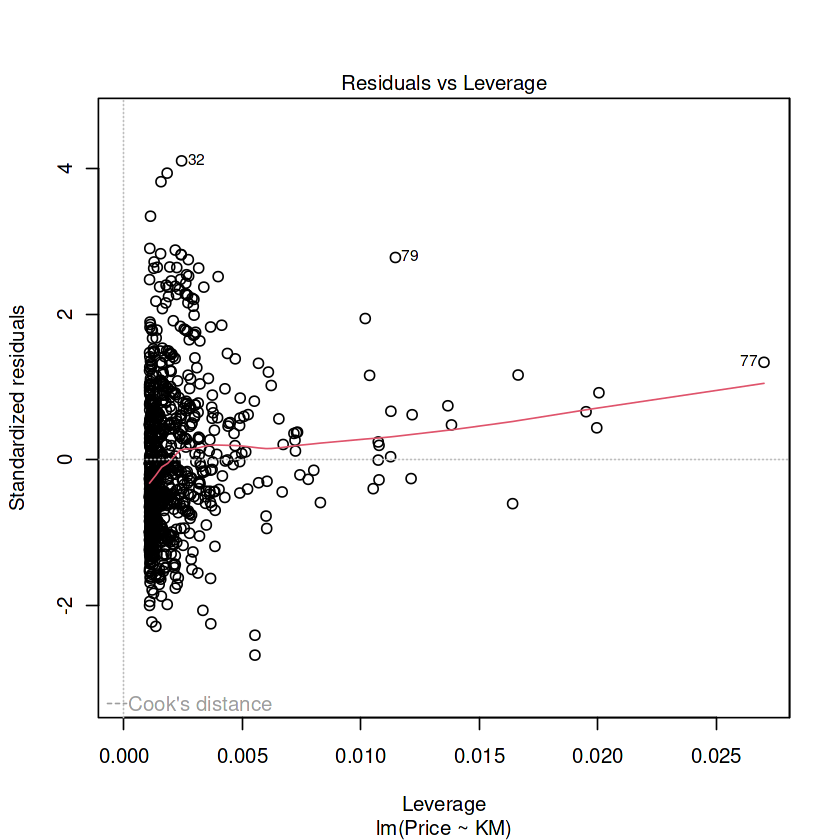

In [27]:
#Diagnosis plots
plot(m1)

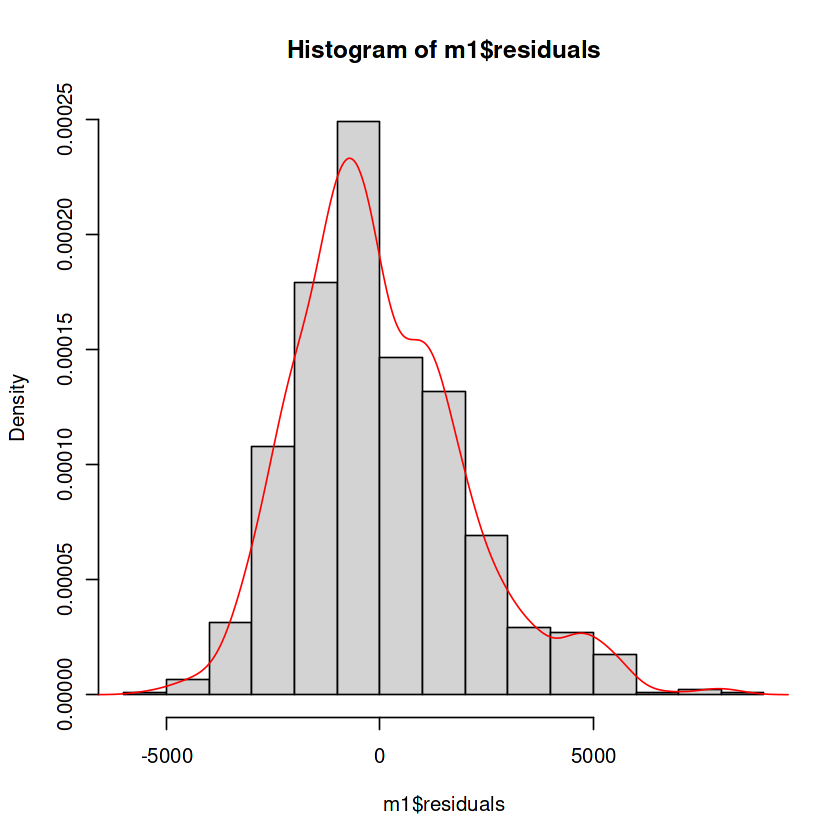

In [28]:
#Assumptions of regression-----------------------
#Normality of residuals
hist(m1$residuals, probability = TRUE)
lines(density(m1$residuals), col = "red")

In [32]:
#Jarque-Bera Test (Skewness = 0 ?)
#p-value < 0.05 reject normality assumption
jarque.test(m1$residuals)
#Anscombe-Glynn Test (Kurtosis = 3 ?)
#p-value < 0.05 reject normality assumption
anscombe.test(m1$residuals)


	Jarque-Bera Normality Test

data:  m1$residuals
JB = 109.76, p-value < 2.2e-16
alternative hypothesis: greater



	Anscombe-Glynn kurtosis test

data:  m1$residuals
kurt = 3.8228, z = 3.8644, p-value = 0.0001114
alternative hypothesis: kurtosis is not equal to 3


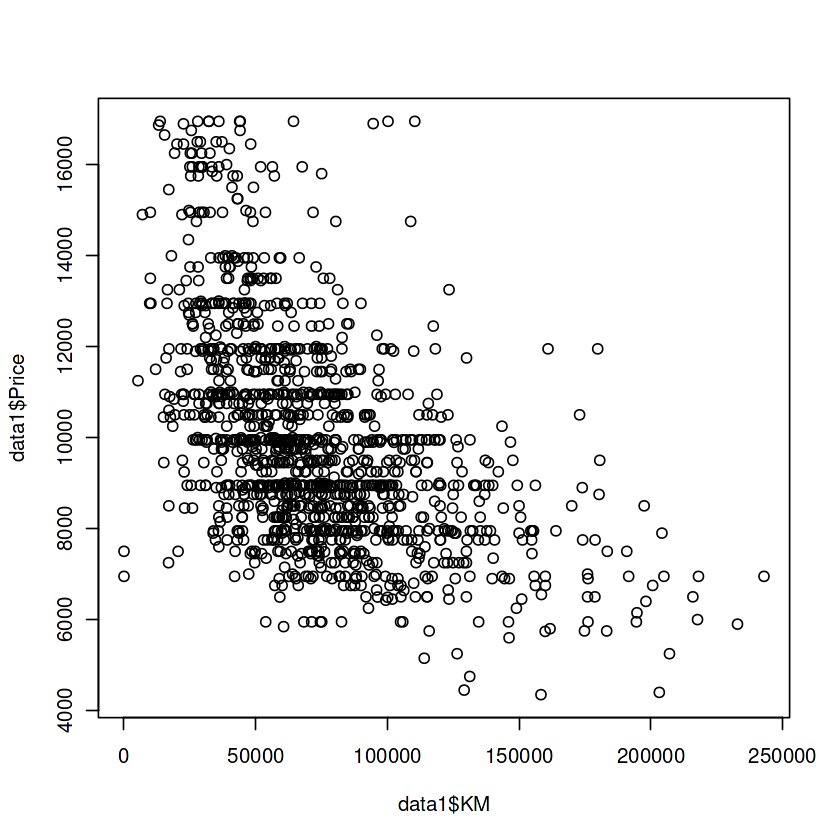

In [33]:
plot(data1$KM, data1$Price)

In [34]:
#Quadratic Regression
m2 <- lm(Price ~ KM + I(KM^2), data = train)
summary(m2)


Call:
lm(formula = Price ~ KM + I(KM^2), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6519.3 -1368.2  -289.7  1195.4  8481.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.347e+04  2.603e+02  51.745  < 2e-16 ***
KM          -6.388e-02  6.128e-03 -10.425  < 2e-16 ***
I(KM^2)      1.683e-07  3.198e-08   5.264 1.75e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1989 on 924 degrees of freedom
Multiple R-squared:  0.2712,	Adjusted R-squared:  0.2696 
F-statistic: 171.9 on 2 and 924 DF,  p-value: < 2.2e-16


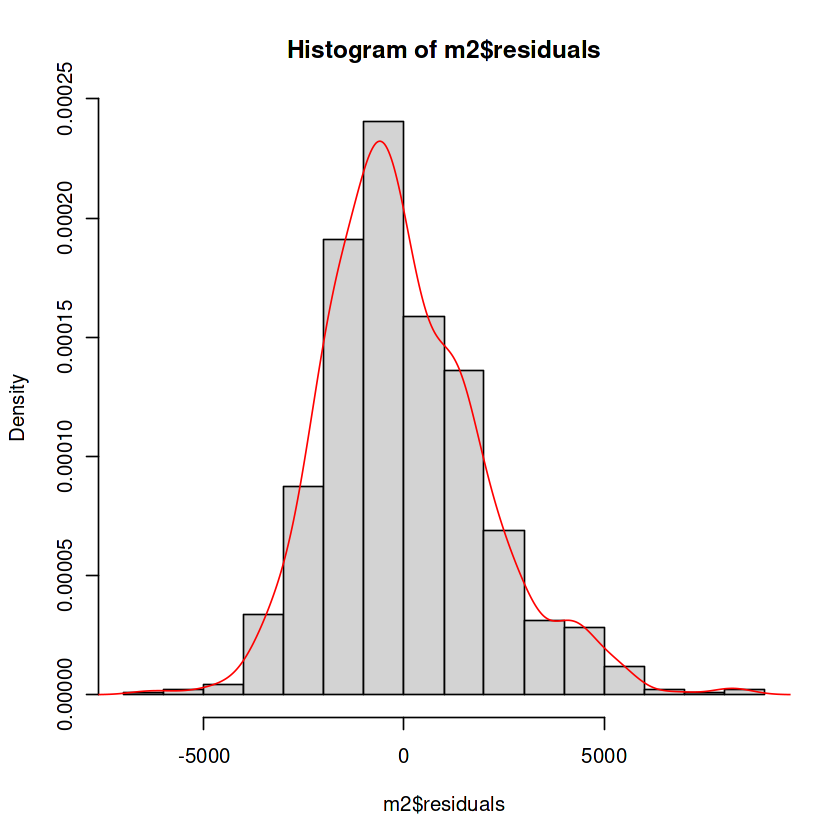

In [36]:
#Assumptions of regression-----------------------
#Normality of residuals
hist(m2$residuals, probability = TRUE)
lines(density(m2$residuals), col = "red")

In [37]:
#Jarque-Bera Test (Skewness = 0 ?)
#p-value < 0.05 reject normality assumption
jarque.test(m2$residuals)
#Anscombe-Glynn Test (Kurtosis = 3 ?)
#p-value < 0.05 reject normality assumption
anscombe.test(m2$residuals)


	Jarque-Bera Normality Test

data:  m2$residuals
JB = 104.96, p-value < 2.2e-16
alternative hypothesis: greater



	Anscombe-Glynn kurtosis test

data:  m2$residuals
kurt = 3.9902, z = 4.3988, p-value = 1.089e-05
alternative hypothesis: kurtosis is not equal to 3


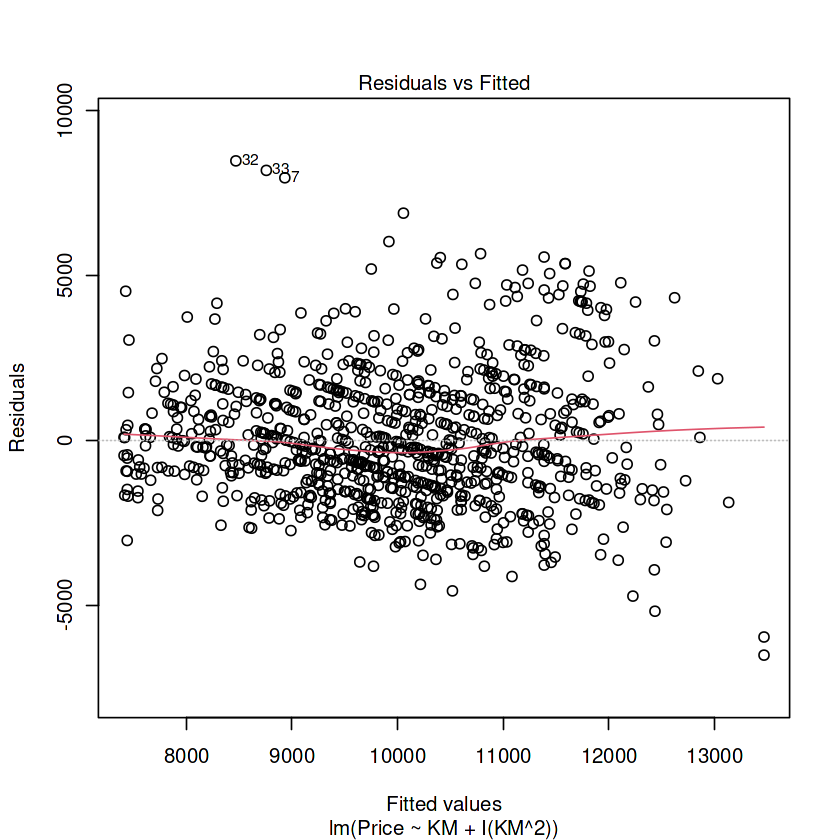

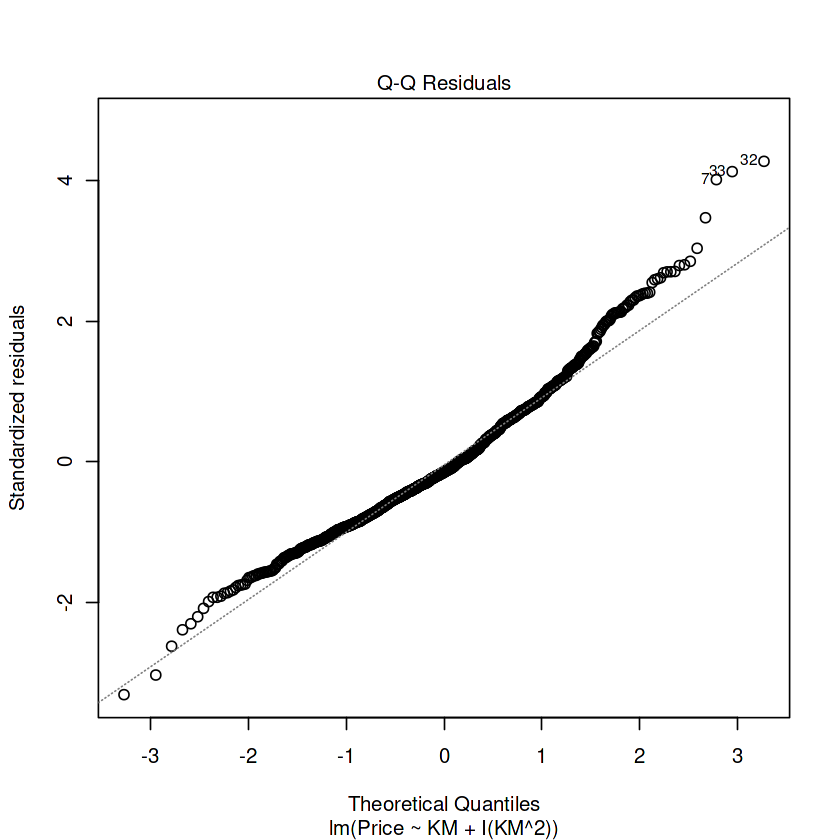

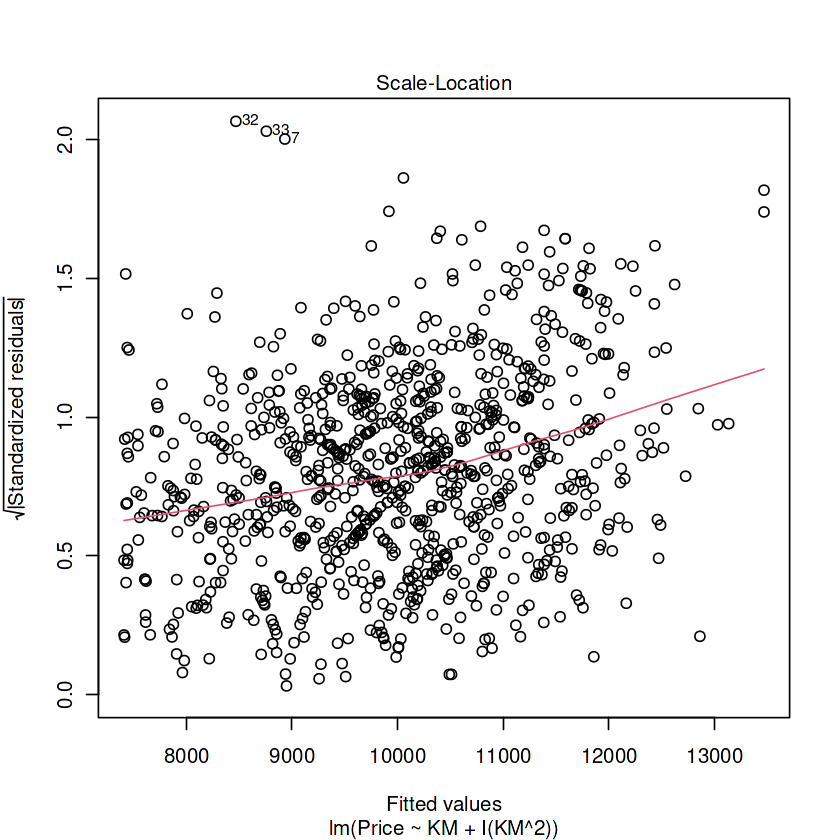

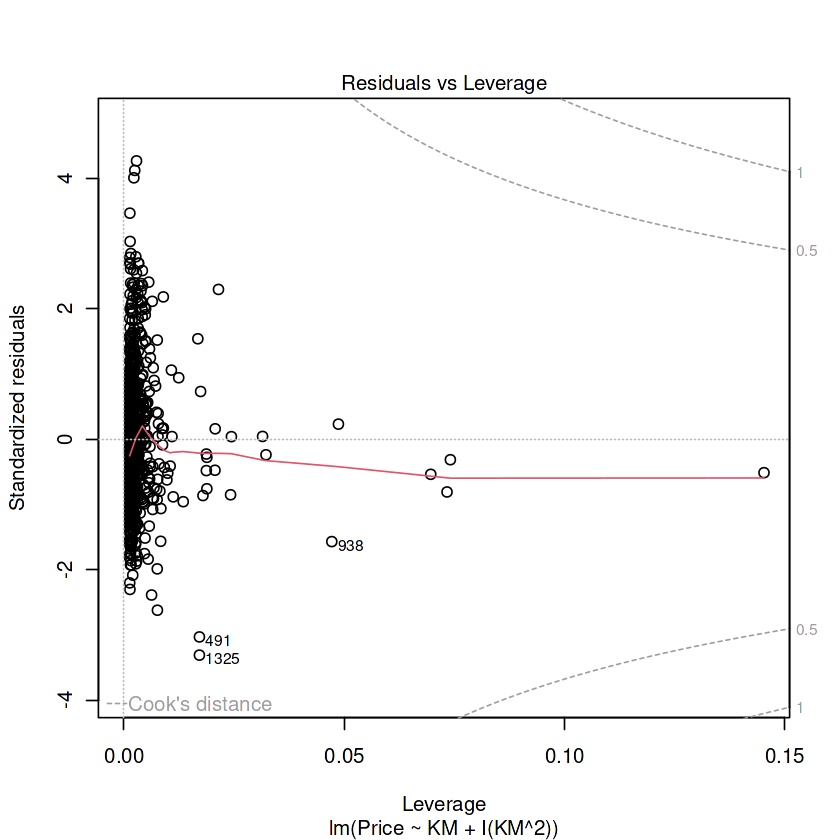

In [38]:
#Diagnosis plots
plot(m2)

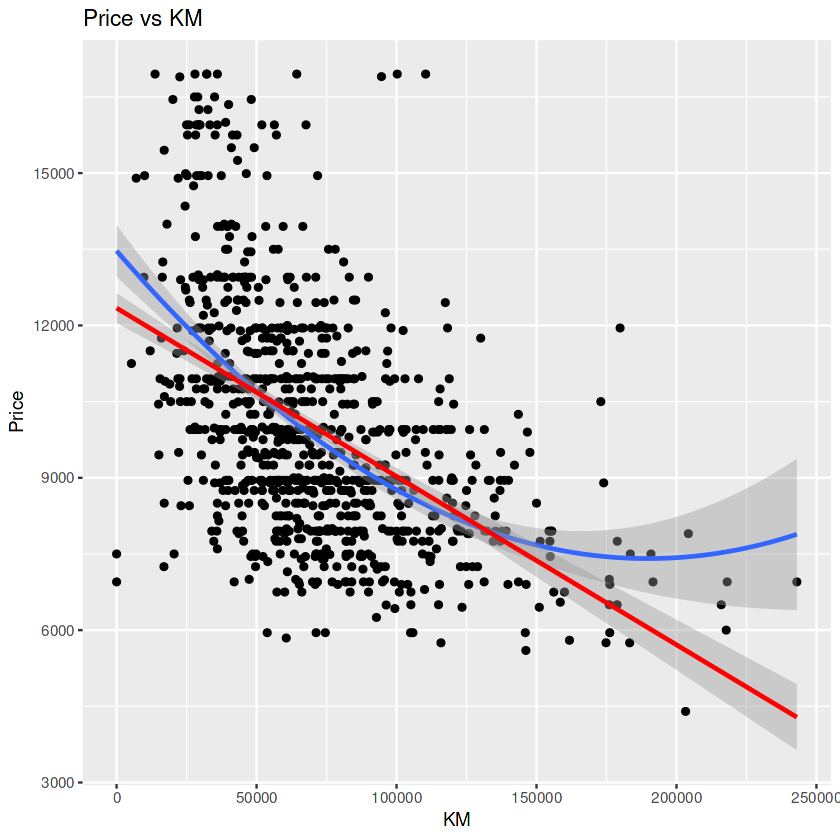

In [41]:
#Price vs Mileage with Linear and Quadratic Fits
ggplot(train, aes(KM, Price)) +
geom_point() +
geom_smooth(method = "lm", formula = y ~ x + I(x^2)) +
geom_smooth(method = "lm", formula = y ~ x, color = "red") +
ggtitle("Price vs KM")

In [43]:
#ANOVA Comparison of Two Models
anova(m1, m2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,925,3765341157,NA,NA,NA,NA
2,924,3655712900,1,109628257,27.7091,1.753852e-07


In [44]:
train2 <- train[ - which(rownames(train) == "7" |
                         rownames(train) == "10" |
                         rownames(train) == "32"), ]

dim(train)
dim(train2)

[1] 927  10

[1] 924  10

In [45]:
m2_2 <- lm(Price ~ KM + I(KM^2), data = train2)
summary(m2_2)


Call:
lm(formula = Price ~ KM + I(KM^2), data = train2)

Residuals:
   Min     1Q Median     3Q    Max 
 -6576  -1348   -259   1216   8242 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.353e+04  2.543e+02  53.199  < 2e-16 ***
KM          -6.572e-02  5.988e-03 -10.976  < 2e-16 ***
I(KM^2)      1.761e-07  3.124e-08   5.638 2.29e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1942 on 921 degrees of freedom
Multiple R-squared:  0.2872,	Adjusted R-squared:  0.2857 
F-statistic: 185.6 on 2 and 921 DF,  p-value: < 2.2e-16


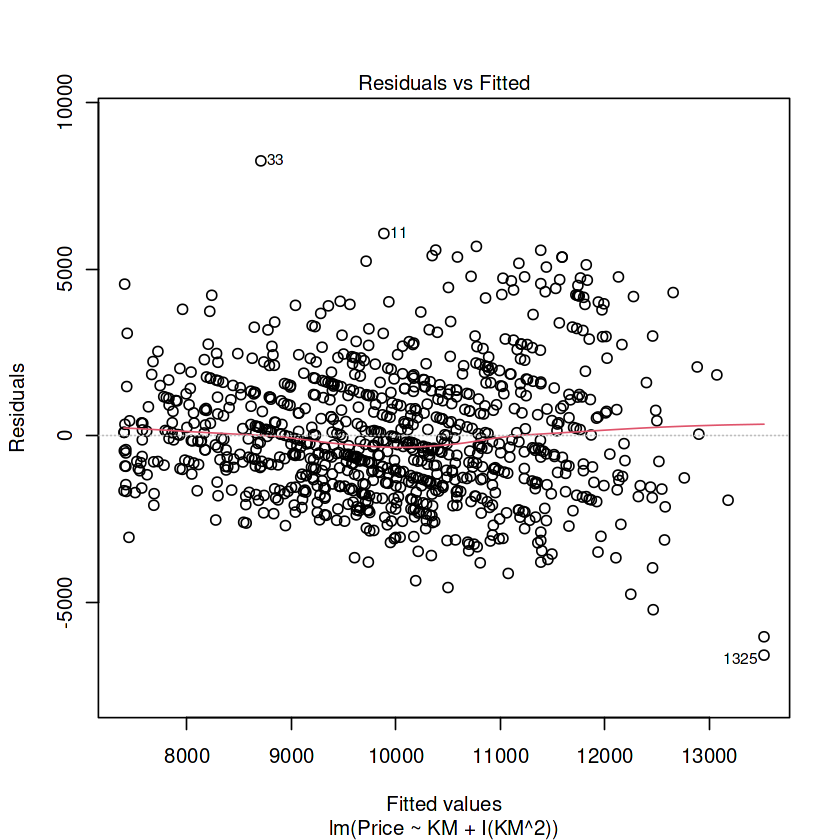

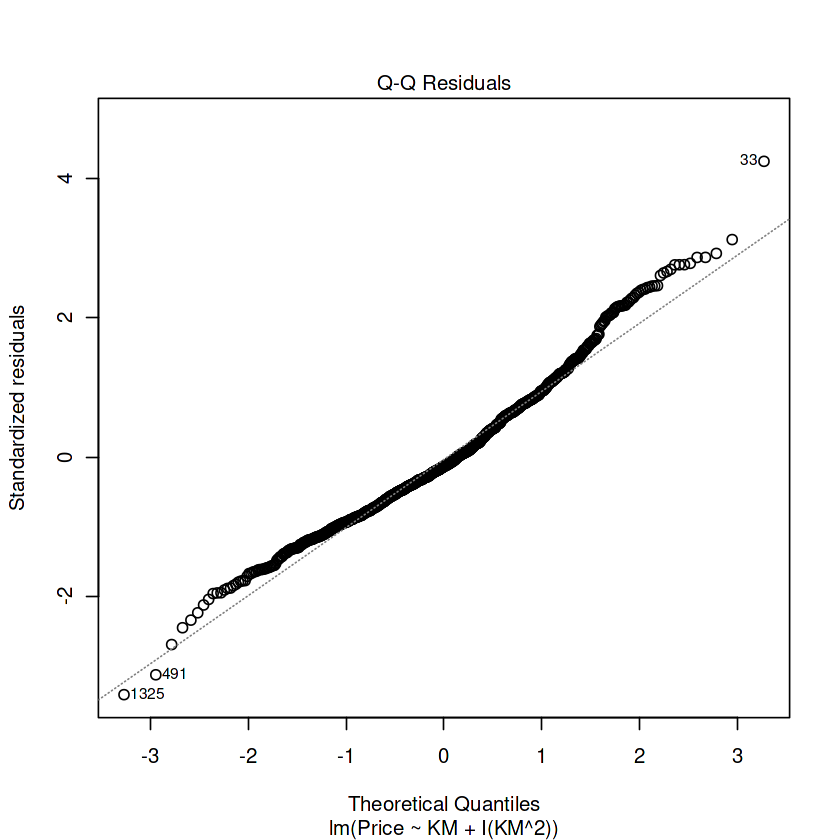

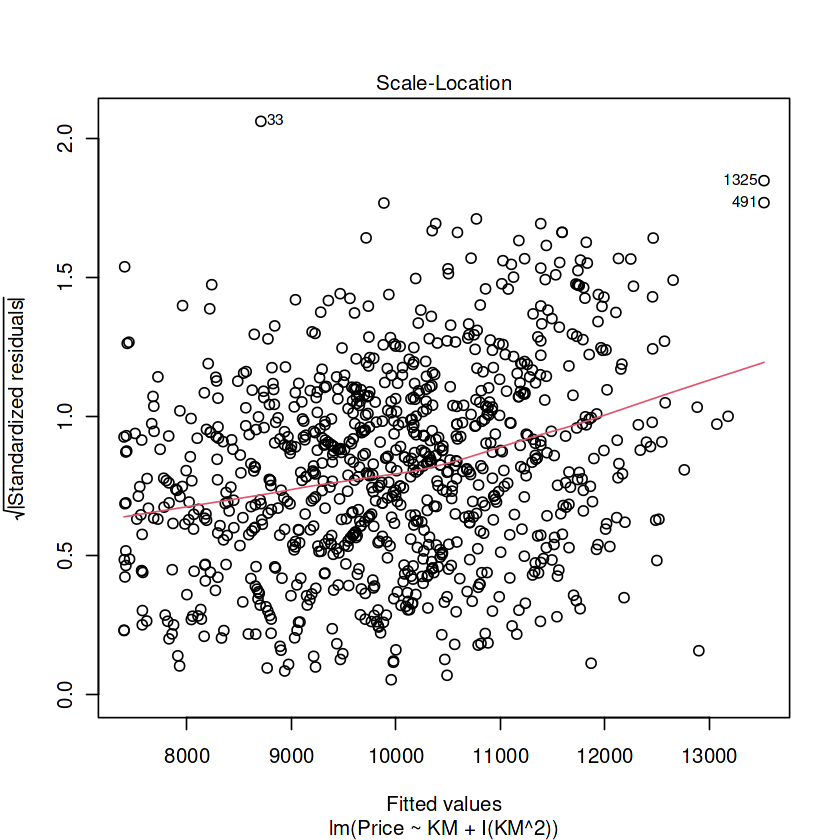

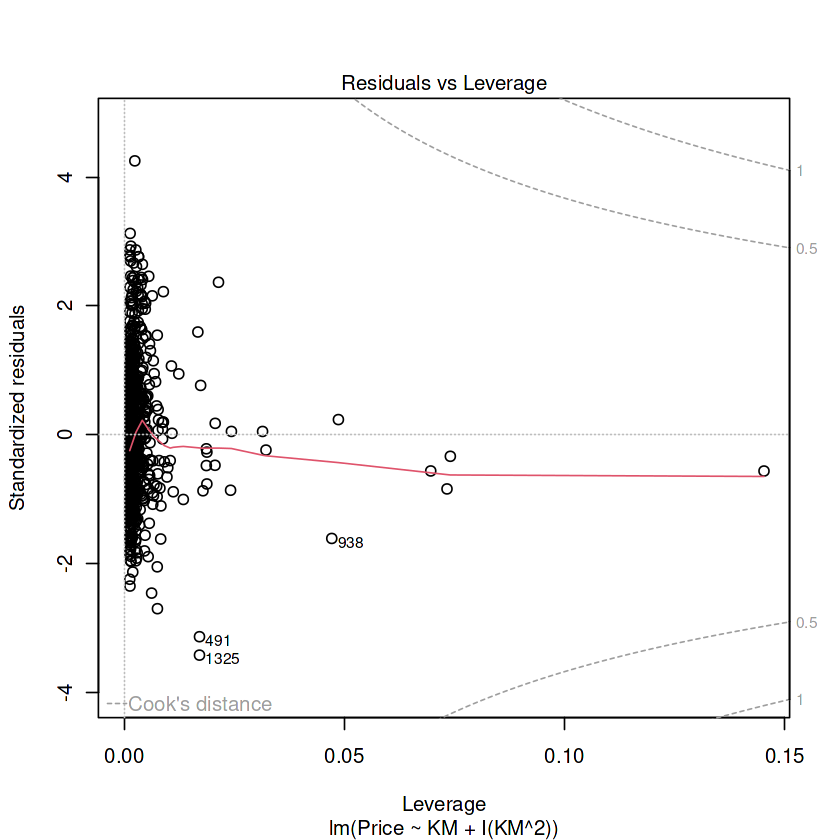

In [46]:
#Diagnosis plots
plot(m2_2)

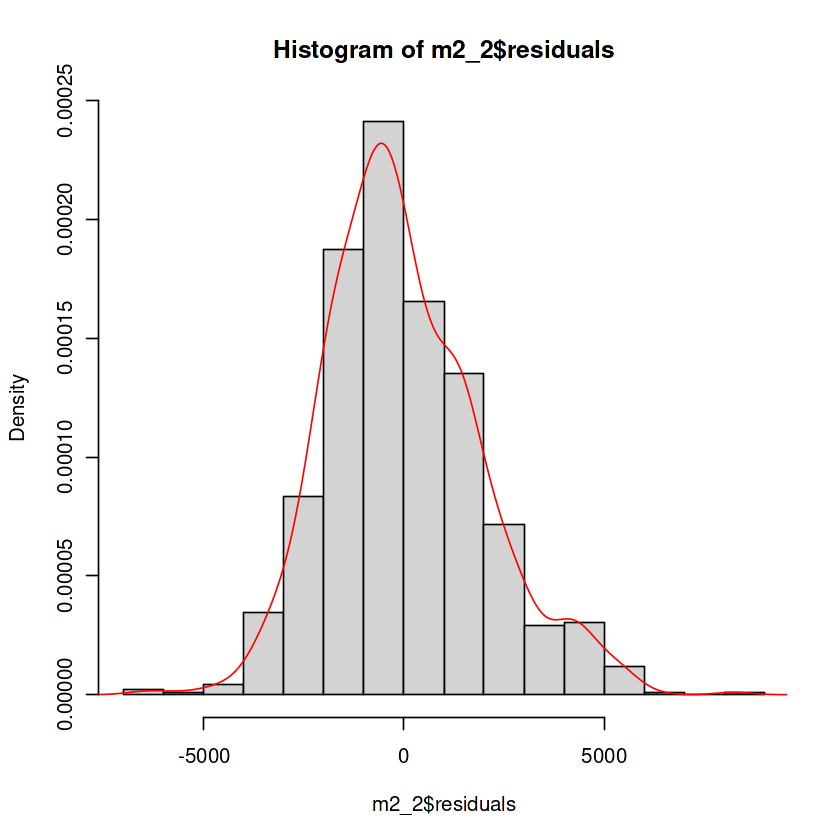

In [47]:
#Assumptions of regression-----------------------
#Normality of residuals
hist(m2_2$residuals, probability = TRUE)
lines(density(m2_2$residuals), col = "red")

In [48]:
#Jarque-Bera Test (Skewness = 0 ?)
#p-value < 0.05 reject normality assumption
jarque.test(m2_2$residuals)
#Anscombe-Glynn Test (Kurtosis = 3 ?)
#p-value < 0.05 reject normality assumption
anscombe.test(m2_2$residuals)


	Jarque-Bera Normality Test

data:  m2_2$residuals
JB = 53.732, p-value = 2.149e-12
alternative hypothesis: greater



	Anscombe-Glynn kurtosis test

data:  m2_2$residuals
kurt = 3.5575, z = 2.8913, p-value = 0.003837
alternative hypothesis: kurtosis is not equal to 3


In [49]:
#Check for Multicollinearity--------------------
#compare coefficient of Price in m1 & m2
m2$coefficients
m2_2$coefficients
cor_table

#Calculate variance inflation factor (VIF):  VIF = 1/(1-R^2)
car :: vif(m2)
car :: vif(m2_2)
#If VIF > 10 then multicollinearity is high

(Intercept)            KM       I(KM^2) 
 1.346935e+04 -6.388228e-02  1.683499e-07

(Intercept)            KM       I(KM^2) 
 1.352582e+04 -6.571881e-02  1.761221e-07

,Price,Age,KM,HP,CC,Weight
Price,1.00,-0.84,-0.52,0.20,0.01,0.29
Age,-0.84,1.00,0.39,-0.05,-0.05,-0.27
KM,-0.52,0.39,1.00,-0.33,0.39,0.19
HP,0.20,-0.05,-0.33,1.00,-0.02,-0.08
CC,0.01,-0.05,0.39,-0.02,1.00,0.66
Weight,0.29,-0.27,0.19,-0.08,0.66,1.00


KM  I(KM^2) 
10.80103 10.80103

KM  I(KM^2) 
10.80316 10.80316

In [50]:
train$KM_scaled <- scale(train$KM)
train$KM <- NULL
head(train)

,Price,Age,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,KM_scaled
,<int>,<int>,<fct>,<int>,<fct>,<fct>,<int>,<chr>,<int>,"<dbl[,1]>"
1010,7350,72,Petrol,86,1,0,1300,<4,1015,1.1647702
650,7950,60,Petrol,86,0,0,1300,5,1015,0.2519363
64,15950,20,Petrol,110,1,0,1600,5,1075,-1.0032101
187,12950,44,CNG,110,1,0,1600,5,1103,-0.8463454
577,9450,67,Petrol,110,1,0,1600,5,1085,0.8162103
491,7500,50,Diesel,90,1,0,2000,<4,1260,-2.0301197


In [51]:
m2_3 <- lm(Price ~ KM_scaled + I(KM_scaled^2), data = train)
summary(m2_3)


Call:
lm(formula = Price ~ KM_scaled + I(KM_scaled^2), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6519.3 -1368.2  -289.7  1195.4  8481.5 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9775.64      76.22 128.258  < 2e-16 ***
KM_scaled      -1399.42      79.39 -17.627  < 2e-16 ***
I(KM_scaled^2)   206.89      39.30   5.264 1.75e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1989 on 924 degrees of freedom
Multiple R-squared:  0.2712,	Adjusted R-squared:  0.2696 
F-statistic: 171.9 on 2 and 924 DF,  p-value: < 2.2e-16


In [52]:
m3 <- lm(Price ~ ., data = train)
m3


Call:
lm(formula = Price ~ ., data = train)

Coefficients:
   (Intercept)             Age  FuelTypeDiesel  FuelTypePetrol              HP  
     6843.2410       -112.0286       1200.1573        785.3136         24.0825  
     MetColor1      Automatic1              CC          Doors4          Doors5  
      -19.6350        296.5454         -0.5876        173.5418        273.5291  
        Weight       KM_scaled  
        6.8794       -473.8577  


In [53]:
summary(m3)


Call:
lm(formula = Price ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5544.7  -679.3   -12.1   633.8  3841.3 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6843.2410  1360.6539   5.029 5.92e-07 ***
Age            -112.0286     2.8345 -39.523  < 2e-16 ***
FuelTypeDiesel 1200.1573  1240.3939   0.968 0.333519    
FuelTypePetrol  785.3136   320.5152   2.450 0.014466 *  
HP               24.0825    18.4051   1.308 0.191042    
MetColor1       -19.6350    75.2922  -0.261 0.794318    
Automatic1      296.5454   162.3341   1.827 0.068062 .  
CC               -0.5876     1.4312  -0.411 0.681493    
Doors4          173.5418   130.2339   1.333 0.183015    
Doors5          273.5291    80.5302   3.397 0.000712 ***
Weight            6.8794     1.2536   5.488 5.27e-08 ***
KM_scaled      -473.8577    46.2028 -10.256  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1064 on 915 

In [54]:
m3 <- lm(Price ~ Age + FuelType + HP + Weight + KM_scaled + I(KM_scaled^2) , data = train)
summary(m3)


Call:
lm(formula = Price ~ Age + FuelType + HP + Weight + KM_scaled + 
    I(KM_scaled^2), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5532.9  -685.9   -16.7   678.9  4145.6 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5447.414   1201.953   4.532 6.61e-06 ***
Age            -113.659      2.777 -40.932  < 2e-16 ***
FuelTypeDiesel  635.424    373.477   1.701 0.089211 .  
FuelTypePetrol  769.700    319.247   2.411 0.016105 *  
HP               15.311      4.066   3.766 0.000177 ***
Weight            8.515      1.127   7.557 9.94e-14 ***
KM_scaled      -399.422     51.950  -7.689 3.82e-14 ***
I(KM_scaled^2)  -69.251     22.750  -3.044 0.002401 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1065 on 919 degrees of freedom
Multiple R-squared:  0.7923,	Adjusted R-squared:  0.7907 
F-statistic: 500.7 on 7 and 919 DF,  p-value: < 2.2e-16


In [55]:
train$IfPetrol <- ifelse(train$FuelType == "Petrol", TRUE, FALSE)
train$FuelType	<- NULL
head(train)

,Price,Age,HP,MetColor,Automatic,CC,Doors,Weight,KM_scaled,IfPetrol
,<int>,<int>,<int>,<fct>,<fct>,<int>,<chr>,<int>,"<dbl[,1]>",<lgl>
1010,7350,72,86,1,0,1300,<4,1015,1.1647702,TRUE
650,7950,60,86,0,0,1300,5,1015,0.2519363,TRUE
64,15950,20,110,1,0,1600,5,1075,-1.0032101,TRUE
187,12950,44,110,1,0,1600,5,1103,-0.8463454,FALSE
577,9450,67,110,1,0,1600,5,1085,0.8162103,TRUE
491,7500,50,90,1,0,2000,<4,1260,-2.0301197,FALSE


In [56]:
m4 <- lm(Price ~ Age + IfPetrol + Weight + KM_scaled + I(KM_scaled^2), data = train)
summary(m4)


Call:
lm(formula = Price ~ Age + IfPetrol + Weight + KM_scaled + I(KM_scaled^2), 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5458.4  -662.4   -40.2   640.1  4133.0 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5091.583   1199.483   4.245 2.41e-05 ***
Age            -113.714      2.793 -40.721  < 2e-16 ***
IfPetrolTRUE    726.793    164.972   4.406 1.18e-05 ***
Weight           10.395      1.009  10.307  < 2e-16 ***
KM_scaled      -382.111     52.088  -7.336 4.83e-13 ***
I(KM_scaled^2)  -77.941     22.722  -3.430  0.00063 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1072 on 921 degrees of freedom
Multiple R-squared:  0.7891,	Adjusted R-squared:  0.7879 
F-statistic: 689.1 on 5 and 921 DF,  p-value: < 2.2e-16


In [57]:
#Assumptions of regression-----------------------
#Jarque-Bera Test (Skewness = 0 ?)
#p-value < 0.05 reject normality assumption
jarque.test(m4$residuals)
#Anscombe-Glynn Test (Kurtosis = 3 ?)
#p-value < 0.05 reject normality assumption
anscombe.test(m4$residuals)


	Jarque-Bera Normality Test

data:  m4$residuals
JB = 108.03, p-value < 2.2e-16
alternative hypothesis: greater



	Anscombe-Glynn kurtosis test

data:  m4$residuals
kurt = 4.6455, z = 6.0870, p-value = 1.15e-09
alternative hypothesis: kurtosis is not equal to 3


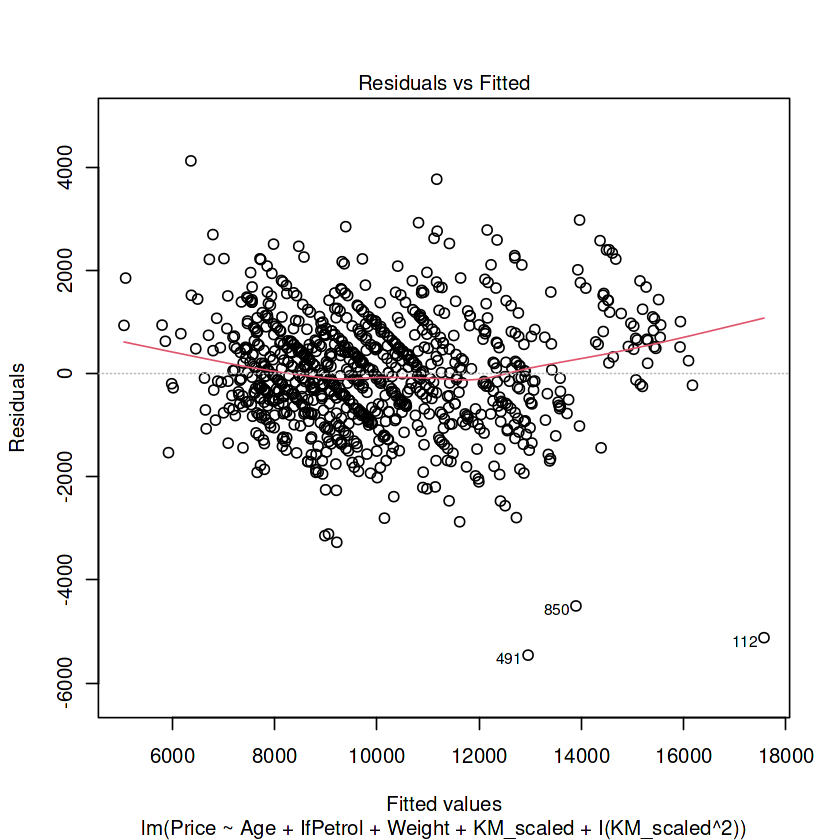

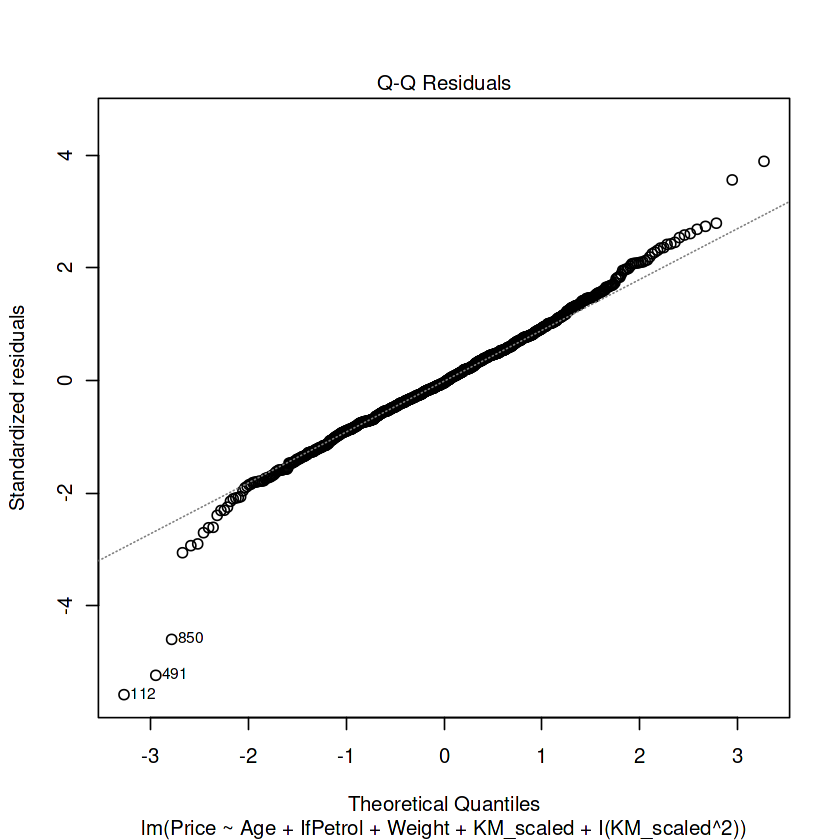

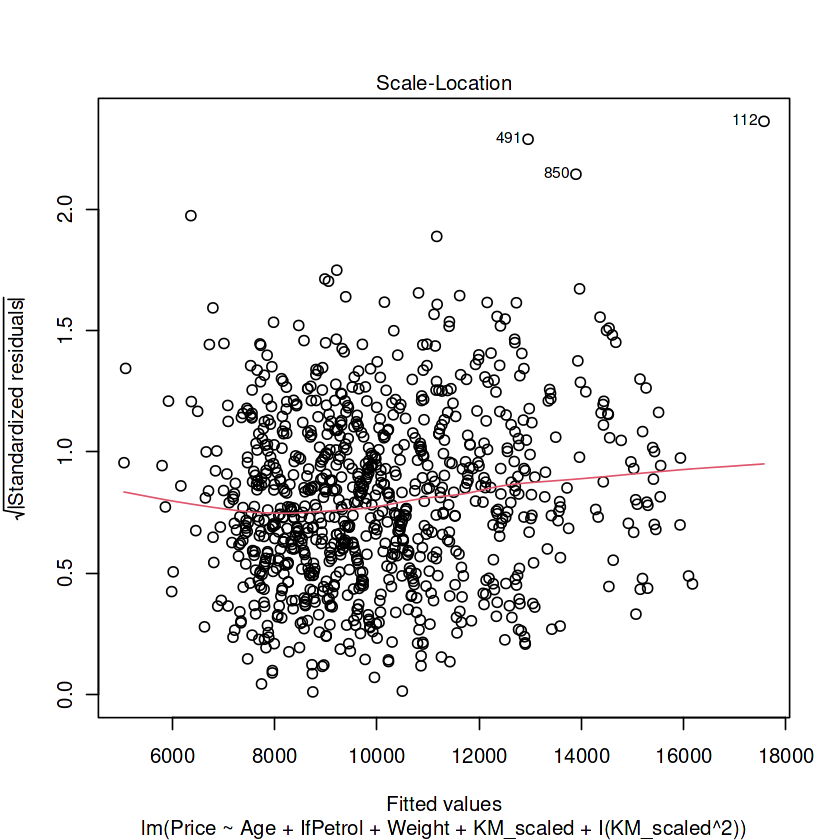

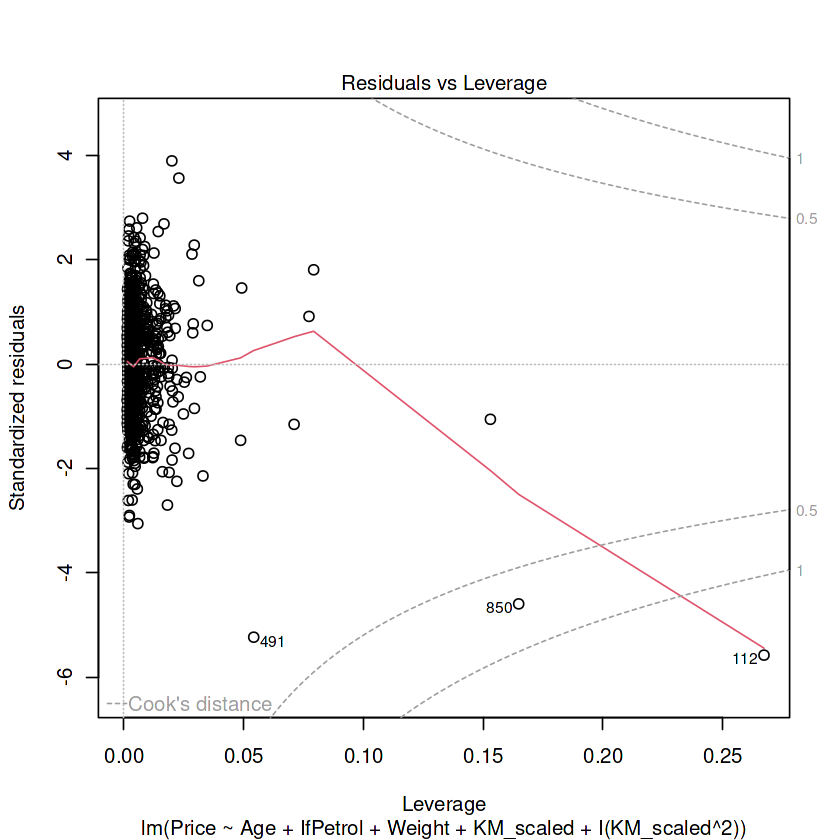

In [58]:
#Diagnosis plots
plot(m4)

In [63]:
#Removing Outliers from the Dataset

train3 <- train[ - which(rownames(train) == "277" |
                         rownames(train) == "286"|
                         rownames(train) == "483"|
                        rownames(train) == "531"|
                        rownames(train) == "1323"|
                        rownames(train) == "346"|
                        rownames(train) == "790"|
                        rownames(train) == "933"|
                        rownames(train) == "439"|
                        rownames(train) == "573"|
                        rownames(train) == "141"), ]

dim(train)
dim(train3)

[1] 927  10

[1] 917  10

In [65]:
total_rows <- nrow(train)

clean_rows <- nrow(train3)

removed_count <- total_rows - clean_rows

removed_percent <- (removed_count / total_rows) * 100

removed_obs <- anti_join(train, train3)

cat("Total observations:", total_rows, "\n")
cat("Removed observations:", removed_count, "\n")
cat("Percentage removed:", round(removed_percent, 2), "%\n\n")

removed_obs

Joining with `by = join_by(Price, Age, HP, MetColor, Automatic, CC, Doors,
Weight, KM_scaled, IfPetrol)`


Total observations: 927 
Removed observations: 10 
Percentage removed: 1.08 %



Price,Age,HP,MetColor,Automatic,CC,Doors,Weight,KM_scaled,IfPetrol
<int>,<int>,<int>,<fct>,<fct>,<int>,<chr>,<int>,"<dbl[,1]>",<lgl>
9450,66,86,0,0,1300,5,1035,-1.59911947,TRUE
10250,53,69,0,0,1900,5,1140,2.06371178,FALSE
9000,48,110,1,0,1600,5,1080,1.38561889,TRUE
8950,63,110,1,0,1600,<4,1065,0.86436226,TRUE
10950,50,97,1,0,1400,5,1060,-1.38409005,TRUE
11750,33,110,0,0,1600,5,1075,-0.45123095,TRUE
9850,53,97,1,0,1400,<4,1025,0.02372789,TRUE
8500,71,86,0,0,1300,<4,1015,-1.54474880,TRUE
8950,68,110,1,0,1600,5,1070,1.37871558,TRUE


In [66]:
m4_2 <- lm(Price ~ Age + IfPetrol + Weight + KM_scaled + I(KM_scaled^2), data = train3)
summary(m4_2)


Call:
lm(formula = Price ~ Age + IfPetrol + Weight + KM_scaled + I(KM_scaled^2), 
    data = train3)

Residuals:
    Min      1Q  Median      3Q     Max 
-5433.7  -664.4   -32.2   640.9  4140.6 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5078.715   1202.990   4.222 2.67e-05 ***
Age            -114.172      2.818 -40.511  < 2e-16 ***
IfPetrolTRUE    748.796    165.962   4.512 7.27e-06 ***
Weight           10.418      1.012  10.299  < 2e-16 ***
KM_scaled      -374.850     53.088  -7.061 3.28e-12 ***
I(KM_scaled^2)  -78.741     22.925  -3.435  0.00062 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1073 on 911 degrees of freedom
Multiple R-squared:  0.7902,	Adjusted R-squared:  0.7891 
F-statistic: 686.3 on 5 and 911 DF,  p-value: < 2.2e-16


In [67]:
#Assumptions of regression-----------------------
#Jarque-Bera Test (Skewness = 0 ?)
#p-value < 0.05 reject normality assumption
jarque.test(m4_2$residuals)
#Anscombe-Glynn Test (Kurtosis = 3 ?)
#p-value < 0.05 reject normality assumption
anscombe.test(m4_2$residuals)


	Jarque-Bera Normality Test

data:  m4_2$residuals
JB = 108.27, p-value < 2.2e-16
alternative hypothesis: greater



	Anscombe-Glynn kurtosis test

data:  m4_2$residuals
kurt = 4.6566, z = 6.0807, p-value = 1.197e-09
alternative hypothesis: kurtosis is not equal to 3


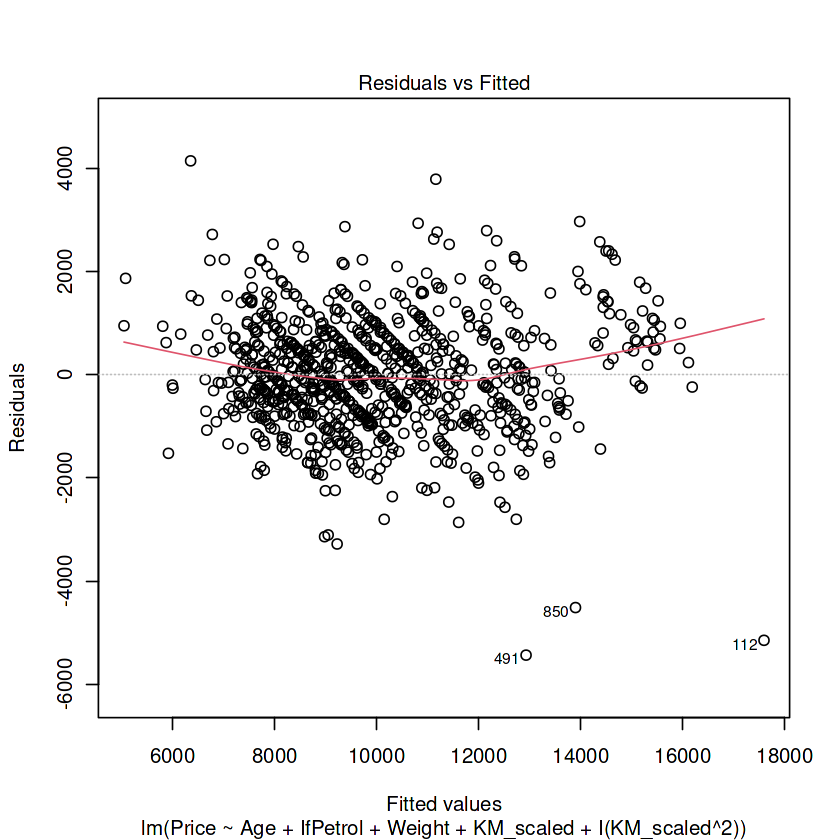

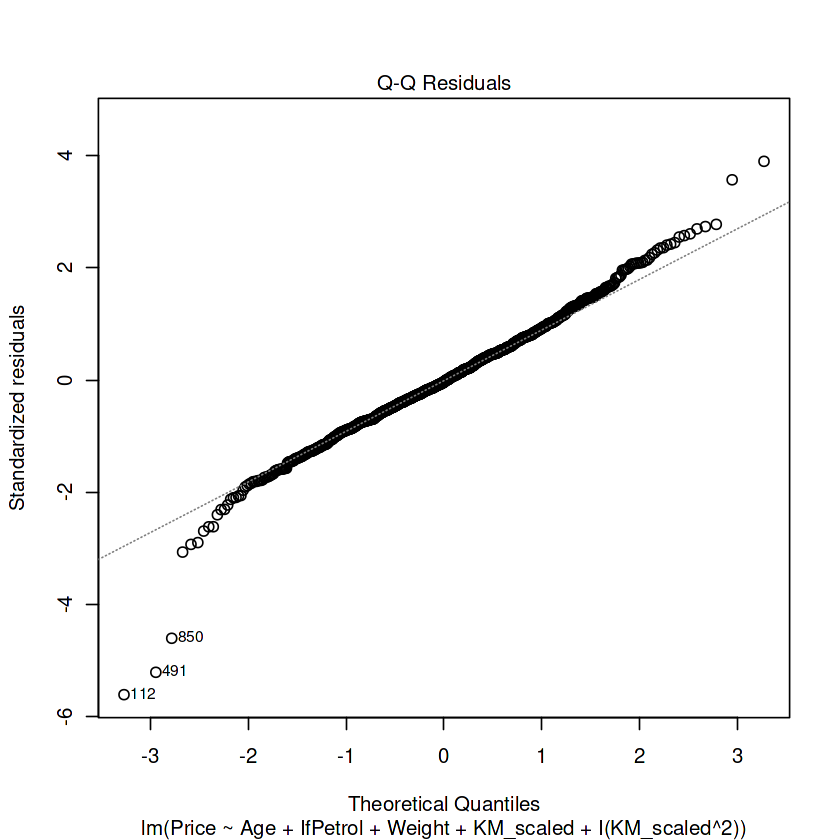

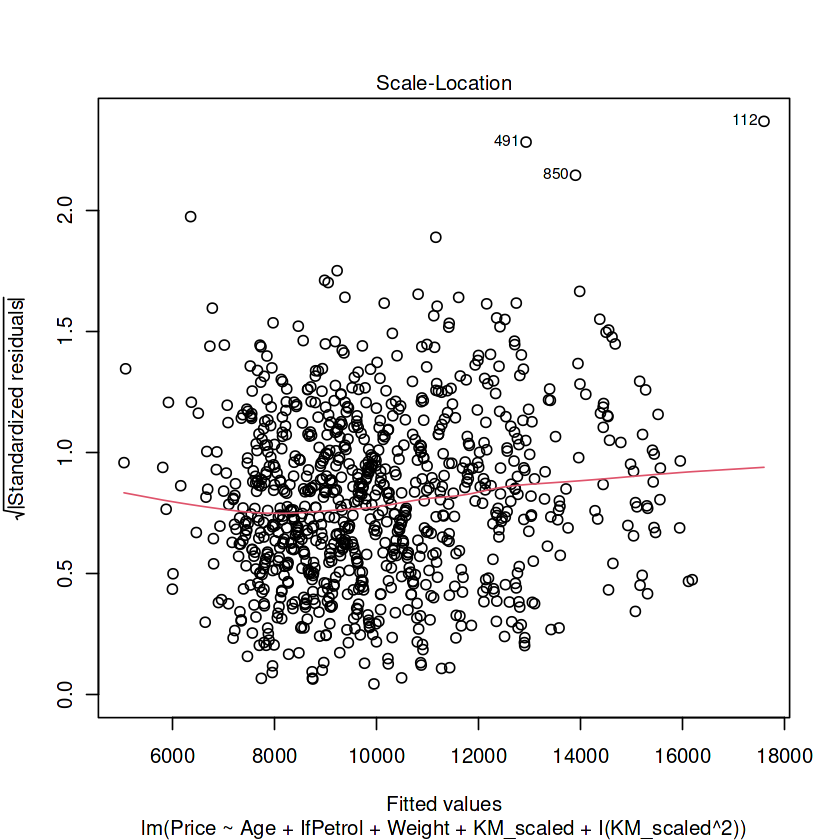

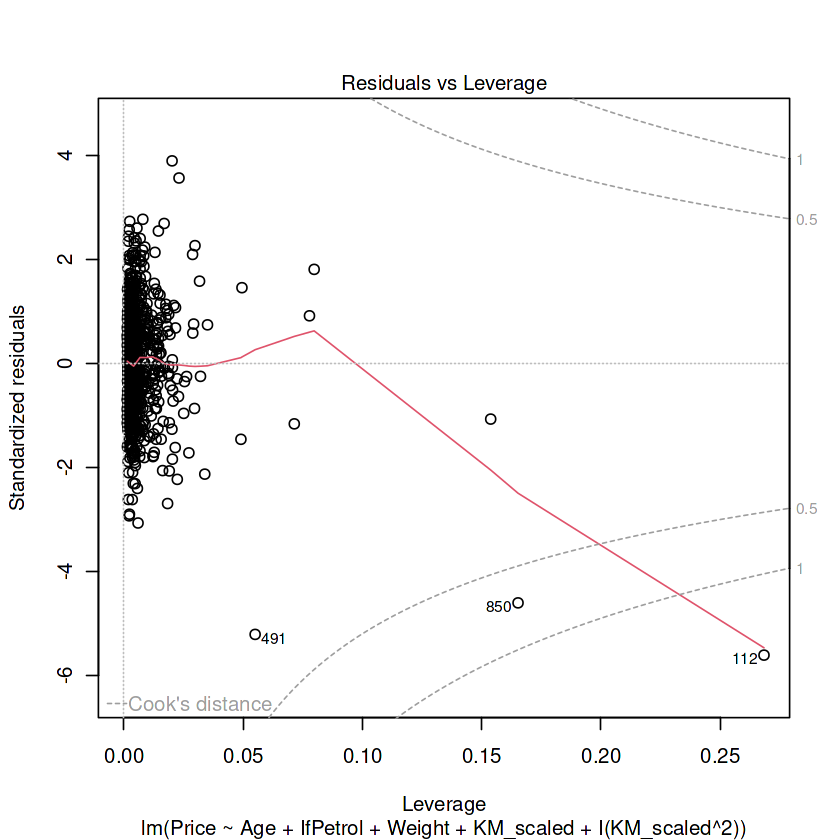

In [68]:
#Diagnosis plots
plot(m4_2)

In [69]:
#Test the model
test$KM_scaled <- scale(test$KM)
#test$KM <- NULL
test$IfPetrol <- ifelse(test$FuelType == "Petrol", TRUE, FALSE)
#test$FuelType <- NULL
dim(test)
dim(train3)
test$pred <- predict(m4_2, test)

[1] 398  12

[1] 917  10

----
# <p style="font-family:newtimeroman;color:#FFD700;font-size:90%;text-align:center;border-radius:10px 10px;">Validation Model</p>

In [72]:
train3$pred <- predict(m4_2, train3)
train3$Error <- train3$Price - train3$pred
abs_error_ <- abs(train3$Error)
mean_abs_error_ <- mean(abs_error_)
mean_abs_error_

[1] 821.8017

In [73]:
test$Error <- test$Price - test$pred

median_error <- median(test$Error)
sd_error <- sd(test$Error)
abs_error <- abs(test$Error)
mean_abs_error <- mean(abs_error)
max_abs_error <- max(abs_error)
min_abs_error <- min(abs_error)

cat("Median of Errors:", median_error, "\n")
cat("Standard Deviation of Errors:", sd_error, "\n")
cat("Mean Absolute Error:", mean_abs_error, "\n")
cat("Max Absolute Error:", max_abs_error, "\n")
cat("Min Absolute Error:", min_abs_error, "\n")


Median of Errors: -137.7757 
Standard Deviation of Errors: 1175.556 
Mean Absolute Error: 879.3915 
Max Absolute Error: 6153.135 
Min Absolute Error: 0.73645 


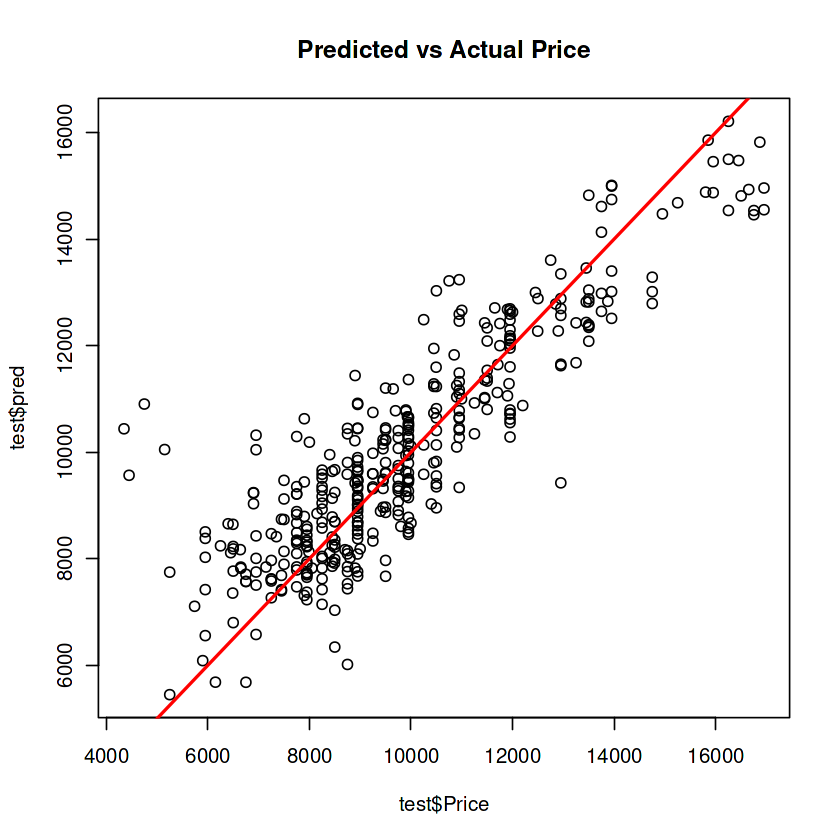

In [74]:
### predicted vs actual
plot(test$Price, test$pred, main = "Predicted vs Actual Price")
abline(a = 0, b = 1, col = "red", lwd = 2)

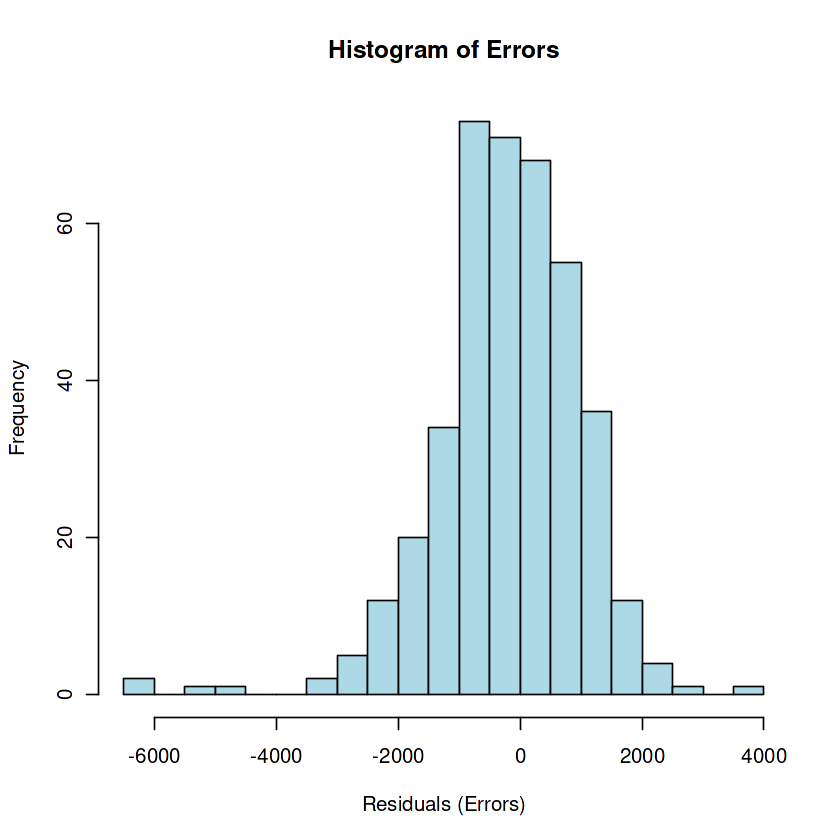

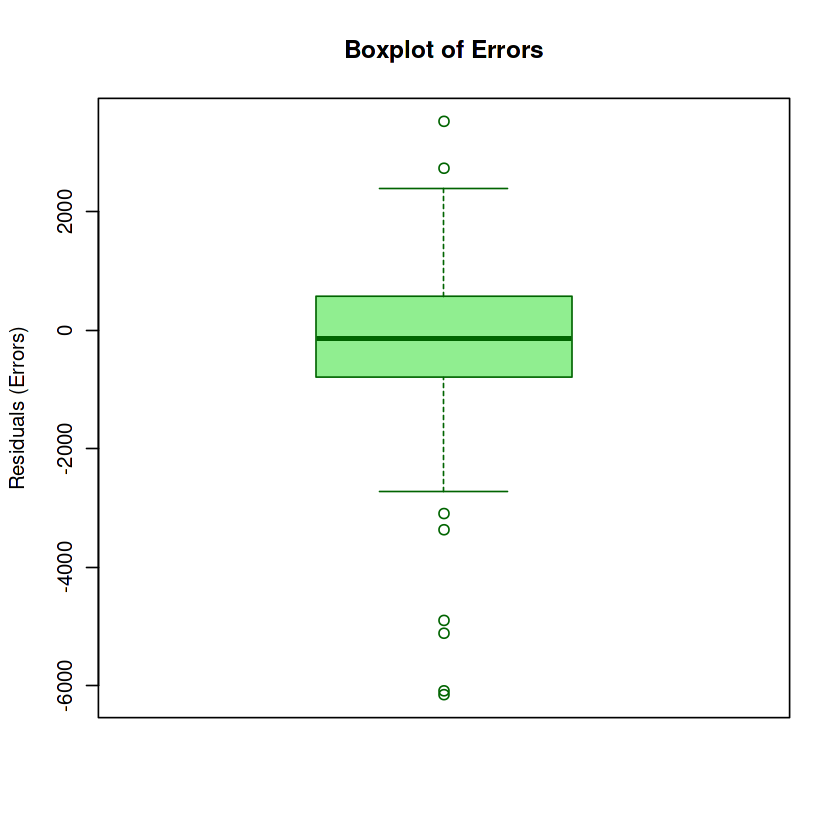

In [75]:
hist(test$Error,
     breaks = 20,                 
     main = "Histogram of Errors",
     xlab = "Residuals (Errors)",
     col = "lightblue",
     border = "black")

boxplot(test$Error,
        main = "Boxplot of Errors",
        ylab = "Residuals (Errors)",
        col = "lightgreen",
        border = "darkgreen")


In [76]:
check_accuracy <- function(actual, predicted, tolerance = 15) {            
  within_range <- abs_error <= tolerance           
  percent_within_range <- mean(within_range) * 100
  return(percent_within_range)
}

train3$pred <- predict(m4_2, train3)
accuracy_train <- check_accuracy(train3$Price, train3$pred)
cat("Percentage within ±15 on TRAIN data:", round(accuracy_train, 2), "%\n")

accuracy_test <- check_accuracy(test$Price, test$pred)
cat("Percentage within ±15 on TEST data:", round(accuracy_test, 2), "%\n")

Percentage within ±15 on TRAIN data: 2.26 %
Percentage within ±15 on TEST data: 2.26 %
